In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import joblib

In [54]:
data = pd.read_csv("normalised_data.csv", index_col = "listing_id",  encoding='utf-8')

data


,num_recepts,latitude,num_floors,new_home,price,num_bedrooms,longitude,num_bathrooms,Barn conversion,Block of flats,...,Terraced house,Town house,Villa,Bath & N E Somerset,Bristol,Devon,Dorset,North Somerset,Somerset,Wiltshire
listing_id,,,,,,,,,,,,,,,,,,,,,
48797779,0.454545,0.983725,0.00,0.0,3000000,0.3125,0.634835,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50785419,0.000000,0.451363,0.00,0.0,2975000,0.0000,0.125135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43906200,0.363636,0.096873,0.75,0.0,2250000,0.3750,0.668397,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26664456,0.363636,0.148675,0.00,0.0,1875000,0.5000,0.742105,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48905557,0.727273,0.275729,0.00,0.0,1850000,0.3125,0.344129,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48580285,0.272727,0.442513,0.00,0.0,1750000,0.3750,0.759606,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48627348,0.363636,0.212013,0.00,0.0,1750000,0.3750,0.287409,0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50786439,0.000000,0.451363,0.00,0.0,1700000,0.0000,0.125135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51722280,0.272727,0.501329,0.00,0.0,1700000,0.3750,0.694177,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
target = data[["price"]]
data = data.drop(["price"], axis = 1)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, random_state=50)

# LSVC = LinearSVC()
# gnb = GaussianNB()
# KNN = KNeighborsClassifier(n_neighbors = 5)
# MNB = MultinomialNB()
# BNB = BernoulliNB()
# LR = LogisticRegression()
# SGD = SGDClassifier()
# SVC = SVC()
# NSVC = NuSVC()
DTC = tree.DecisionTreeClassifier()

def output_result(model, name):
    trained_model = model.fit(x_train, y_train)
#     prediction = trained_model.predict(x_test)
    joblib.dump(trained_model, f"{name}_model.sav")
#     return prediction

# result = output_result(LSVC, "LSVC")
# result = output_result(gnb, "gnb")
# result = output_result(KNN, "KNN")
# result = output_result(MNB, "MNB")
# result = output_result(BNB, "BNB")
# result = output_result(LR, "LR")
# result = output_result(SGD, "SGD")
# result = output_result(SVC, "SVC")
# result = output_result(NSVC, "NSVC")
output_result(DTC, "DTC")

# result

In [57]:
loaded_model = joblib.load("DTC_model.sav")
result = loaded_model.predict(x_test)

result


array([179950, 120000, 415000, ..., 230000,  60000, 195000])

/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


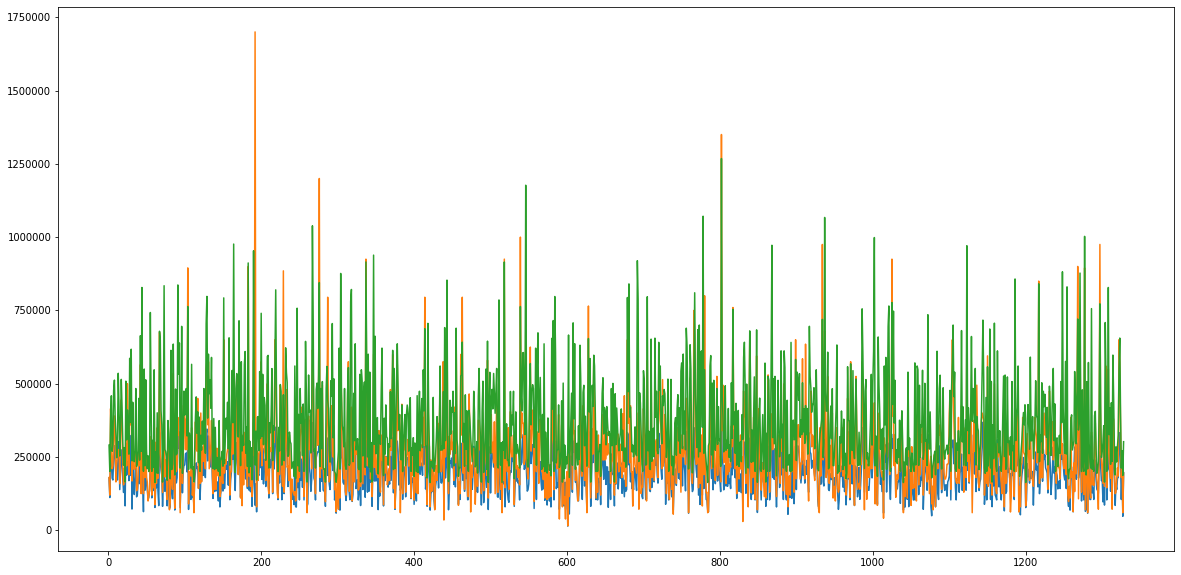

In [66]:

# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)

upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

# Fit models
lower_model.fit(x_train, y_train)
upper_model.fit(x_train, y_train)

# Record actual values on test set
CI = pd.DataFrame(result, columns=['price'])

# Predict
CI['lower'] = lower_model.predict(x_test)
CI['upper'] = upper_model.predict(x_test)

CI.index += 1

CI.to_csv(path_or_buf = "/Users/hoanjinan_otoko/Desktop/epam-ds-training/greenfox/hoanjinan/week-07/CI.csv")

plt.plot(CI.index.tolist(), CI["lower"])
plt.plot(CI.index.tolist(), CI["price"])
plt.plot(CI.index.tolist(), CI["upper"])
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [60]:
count = 0
for i in range(len(CI)):
    if CI["lower"].values[i] < CI["price"].values[i] < CI["upper"].values[i]:
        count += 1
        
count / len(CI)

0.7838855421686747

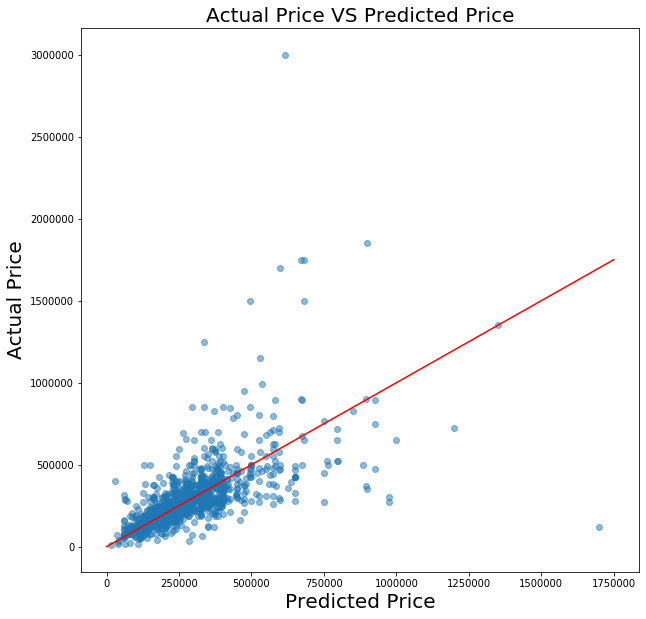

In [62]:
x = result
y = y_test["price"].values

x_line = range(1750000)
y_line = range(1750000)
plt.plot(x_line, y_line, "r")
plt.scatter(x, y, alpha=0.5)
plt.title('Actual Price VS Predicted Price', fontsize = 20)
plt.xlabel('Predicted Price', fontsize = 20)
plt.ylabel('Actual Price', fontsize = 20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

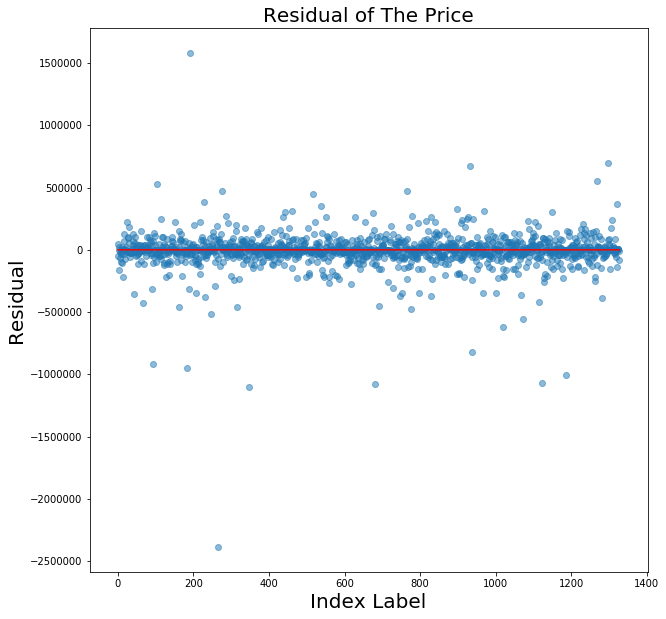

In [63]:
residual = x - y
x_label = range(len(x))
zeros = [0] * len(x)

plt.title('Residual of The Price', fontsize = 20)
plt.xlabel('Index Label', fontsize = 20)
plt.ylabel('Residual', fontsize = 20)
plt.plot(x_label, zeros, "r")
plt.scatter(x_label, residual, alpha=0.5)
plt.show()

